In [1]:
import tensorflow as tf
from tensorflow import keras
import keras

import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [11]:
train = ImageDataGenerator(rescale= 1/255);
validation = ImageDataGenerator(rescale= 1/255);

In [24]:
train_dataset= train.flow_from_directory(r'D:\datasets for projects\archived\testing',
                                         target_size=(100,150),
                                         batch_size=5,
                                        class_mode='binary')
validation_dataset= train.flow_from_directory(r'D:\datasets for projects\archived\rps-cv-images',
                                         target_size=(100,150), 
                                         batch_size=5,
                                        class_mode='binary')

Found 2188 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.


In [25]:
train_dataset.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [27]:
model.summary()  # let's have a look at our model so far

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10880)            

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(
      train_dataset,
      steps_per_epoch=32,
      epochs=20,
      validation_data=validation_dataset,
      validation_steps=8,
      verbose=2)

Epoch 1/20
32/32 - 3s - loss: 1.1215 - accuracy: 0.3500 - val_loss: 1.0893 - val_accuracy: 0.3750
Epoch 2/20
32/32 - 2s - loss: 1.0113 - accuracy: 0.5562 - val_loss: 0.8803 - val_accuracy: 0.6500
Epoch 3/20
32/32 - 2s - loss: 0.7865 - accuracy: 0.7500 - val_loss: 0.7792 - val_accuracy: 0.7250
Epoch 4/20
32/32 - 2s - loss: 0.8730 - accuracy: 0.6562 - val_loss: 0.8252 - val_accuracy: 0.7250
Epoch 5/20
32/32 - 2s - loss: 0.7952 - accuracy: 0.7437 - val_loss: 0.7014 - val_accuracy: 0.9000
Epoch 6/20
32/32 - 2s - loss: 0.7123 - accuracy: 0.8438 - val_loss: 0.6081 - val_accuracy: 0.9500
Epoch 7/20
32/32 - 3s - loss: 0.6969 - accuracy: 0.8500 - val_loss: 0.6779 - val_accuracy: 0.8750
Epoch 8/20
32/32 - 2s - loss: 0.6678 - accuracy: 0.8875 - val_loss: 0.6832 - val_accuracy: 0.8250
Epoch 9/20
32/32 - 2s - loss: 0.6719 - accuracy: 0.8687 - val_loss: 0.7118 - val_accuracy: 0.8250
Epoch 10/20
32/32 - 2s - loss: 0.6802 - accuracy: 0.8750 - val_loss: 0.6240 - val_accuracy: 0.9250
Epoch 11/20
32/32 -

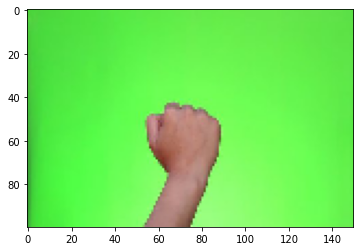

Rock


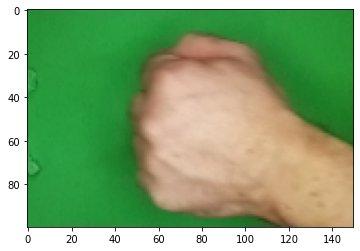

Rock


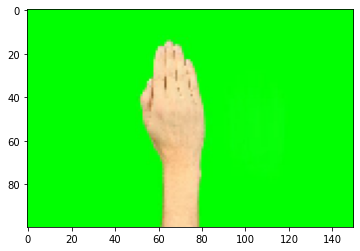

Rock


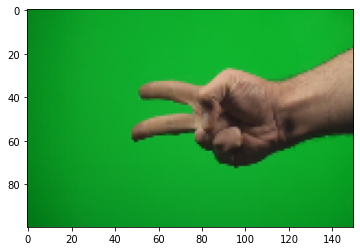

Scissor


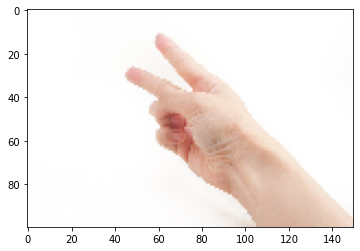

Paper


In [36]:
from keras.models import load_model

dir_path = r'D:\datasets for projects\id'

for i in os.listdir(dir_path) :
    img = image.load_img(dir_path +'\\'+ i, target_size=(100,150) )
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val = model.predict_classes(images)
    if val == 0:
        print("Paper")
    elif val == 1 :
        print("Rock")
    else:
        print("Scissor")
        